# DS 440 Data Mining
# Lecture 19: Logistic Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

## Logistic Regression model

Lets generate some synthetic data

In [2]:
np.random.seed(0)
l = 30
xs = np.random.randn(l)
ys = np.ones(l)
ys[xs < 0.4] = 0
ys[xs > 0.6] = 1

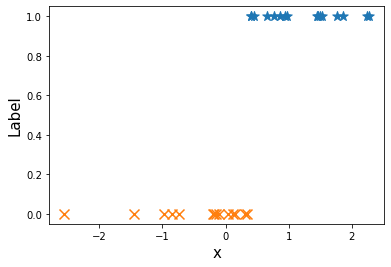

In [3]:
plt.scatter(xs[ys == 1],ys[ys == 1],marker = '*',s = 100)
plt.scatter(xs[ys == 0],ys[ys == 0],marker = 'x',s = 100)
plt.xlabel('x',size = 15)
plt.ylabel('Label',size = 15)
plt.show()

Since this is a classification problem, instead of fitting a function directly and predicting the y values, we fit a special kind of function which can predict a discrete label y = 0/1. **We fit a logistic or a sigmoid function**

$$
y = \frac{1}{1+ e^{-x}}
$$

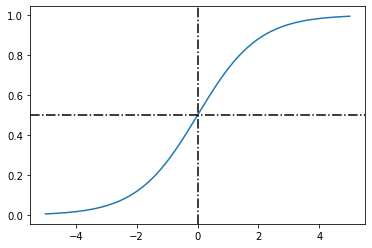

In [4]:
x = np.linspace(-5,5,200)
y = 1/(1 + np.exp(-1*x))
plt.plot(x,y)
plt.axvline(x = 0,color = 'k',linestyle = '-.')
plt.axhline(y = 0.5,color = 'k',linestyle = '-.')
plt.show()

Here, if the standard sigmoid above is a best fit to our data, then  
1. All the x for which y > 0.5 are predicted to have a label 1, i.e $x>0 \implies y = 1$
2. All the x for which y < 0.5 are predicted to have a label 0, i.e $x<0 \implies y = 0$
3. **Hence for the standard sigmoid x = 0 is the breaking point**

## Make the sigmoid function parameterizable to fit to any data

We can put any degree polynomial as a power of e.

In [5]:
def sigmoid(x):
    poly = x
    y = 1/(1 + np.exp(-1*(poly)))
    return y

def custom_sigmoid(beta0,beta1,x):
    poly = beta0 + beta1*x
    y = 1/(1 + np.exp(-1*(poly)))
    return y

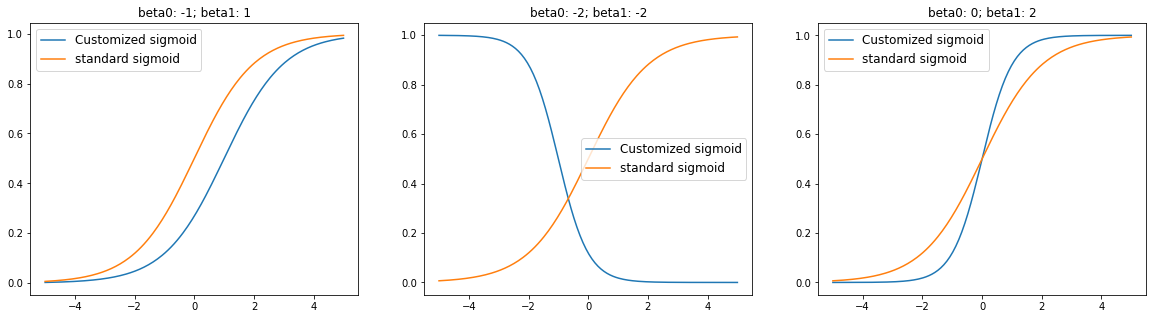

In [6]:
x = np.linspace(-5,5,200)
beta0 = [-1,-2,0]
beta1 = [1,-2,2]
fig = plt.figure(figsize=(20,5))
for i in range(len(beta0)):
    ax = fig.add_subplot(1,3,i+1)
    plt.plot(x,custom_sigmoid(beta0[i],beta1[i],x), label = 'Customized sigmoid')
    plt.plot(x,sigmoid(x), label = 'standard sigmoid')
    plt.title(f'beta0: {beta0[i]}; beta1: {beta1[i]}')
    plt.legend(prop = {'size':12})
plt.show()

### <mark style="background-color: #FFFF00">Exercise</mark> 

1. Find the beaking point of x for all 3 customized sigmoids

Hence for any univariate dataset:
1. Optimize for good values of beta0 and beta1 that can fit well to the given data
2. For fitting a more complex function, just increase the complexity of the polynomial in the power of e

For a multivariate dataset
1. just use a multivariate polynomial in the power of e

## Using sklearn to fit to the synthetic data

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
clf = LogisticRegression(random_state=0).fit(xs.reshape(-1,1), ys)

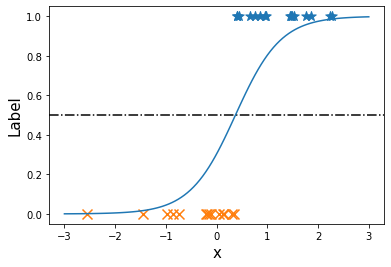

In [9]:
## data
plt.scatter(xs[ys == 1],ys[ys == 1],marker = '*',s = 100)
plt.scatter(xs[ys == 0],ys[ys == 0],marker = 'x',s = 100)
plt.xlabel('x',size = 15)
plt.ylabel('Label',size = 15)

## Prediction
x = np.linspace(-3,3,100)
beta0 = clf.intercept_[0]
beta1 = clf.coef_[0]
y = custom_sigmoid(beta0,beta1,x)
plt.axhline(y = 0.5,color = 'k', linestyle = '-.')
plt.plot(x,y)
plt.show()

Hence the x value for which sigmoid function goes above 0.5 is the breakpoint. Hence breakpoint is the solution x to the following problem
$$
0.5 = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}
$$

## Getting a different classification dataset

In [10]:
D =load_breast_cancer()

In [11]:
print(D.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## How to test if a model is fitted/performing well

1. Divide the data into training and testing set. Training set has the majority of samples. For example 80%
2. If you want to compare between 2 models. Fit both models on the training set. Then predict on the testing set.
3. The model with better performance on the testing set (unseen samples) is chosen as the best model.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = D.data
y = D.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
clf = LogisticRegression(random_state=0).fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
clf = LogisticRegression(random_state=0,solver = 'newton-cg',penalty = 'l2').fit(X_train,y_train)

In [17]:
pred = clf.predict(X_test)

In [18]:
## Computing accuracy

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test,pred)

0.956140350877193